In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# jupyter specific
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use = 'default'
sns.set_style("whitegrid")

### Inputs

In [4]:
working_directory= '~/path_to_processed_dementia_data/'
file_name = 'train.csv'
file_name_test = 'test.csv'
target = 'labels'
exclusions = []

random_subset_percentage = 0
test_set_percentage = 0  # test set is separately provided

### Read data into memory

In [5]:
%cd $working_directory

df_train = pd.read_csv(file_name)
df_train.head()

/Users/amirziai/Downloads/result


,BEAGIT,BEAHALL,BEANX,BEAPATHY,BEDEL,BEDEP,BEDISIN,BEIRRIT,BEPERCH,BEREM,...,traila,trailali,trailarr,trailb,trailbli,trailbrr,udsbenrs,udsbentc,udsbentd,vegetables
0,No,No,NaN,Yes,No,Yes,No,No,Yes,NaN,...,50.0,NaN,NaN,191.0,NaN,NaN,NaN,NaN,NaN,4.0
1,No,No,NaN,No,No,No,No,No,No,No,...,31.0,24.0,0.0,300.0,11.0,4.0,NaN,NaN,NaN,4.0
2,No,No,NaN,No,No,No,No,No,No,No,...,45.0,24.0,0.0,183.0,24.0,6.0,NaN,NaN,NaN,2.0
3,No,No,NaN,No,No,No,No,No,No,No,...,53.0,24.0,0.0,232.0,17.0,4.0,NaN,NaN,NaN,8.0
4,No,No,NaN,Yes,No,No,No,No,No,No,...,29.0,24.0,0.0,110.0,24.0,4.0,NaN,NaN,NaN,6.0


### Steps

#### 1- Data preparation

- One-hot encode the data (OHE)
- Fill NaNs with zero
- Remove overly unique variables
- Extract X (features) and y (target) datasets

In [13]:
X_train, X_test, y_train, y_test, le = train_test_xy(df_train.copy(),
                                                 target,
                                                 exclusions,
                                                 file_name_test,
                                                 test_set_percentage)

         NACCID    Removed- overly unique           32.5%
        animals                   Fill NA           18.1%
          beage                   Fill NA            1.3%
            bmi                   Fill NA           19.1%
         decage                   Fill NA           11.9%
       digiblen                   Fill NA           20.1%
       digiflen                   Fill NA           19.6%
Encoding the target variable
        logimem                   Fill NA           20.8%
       memunits                   Fill NA           21.4%
       mmseorda                   Fill NA           13.6%
       mmseorlo                   Fill NA           13.6%
       naccmmse                   Fill NA           14.0%
       pentagon                   Fill NA           36.9%
           race                   Fill NA            2.3%
         traila                   Fill NA           24.0%
       trailali                   Fill NA           43.9%
       trailarr                   Fill NA  

#### 2- Identify driving variables

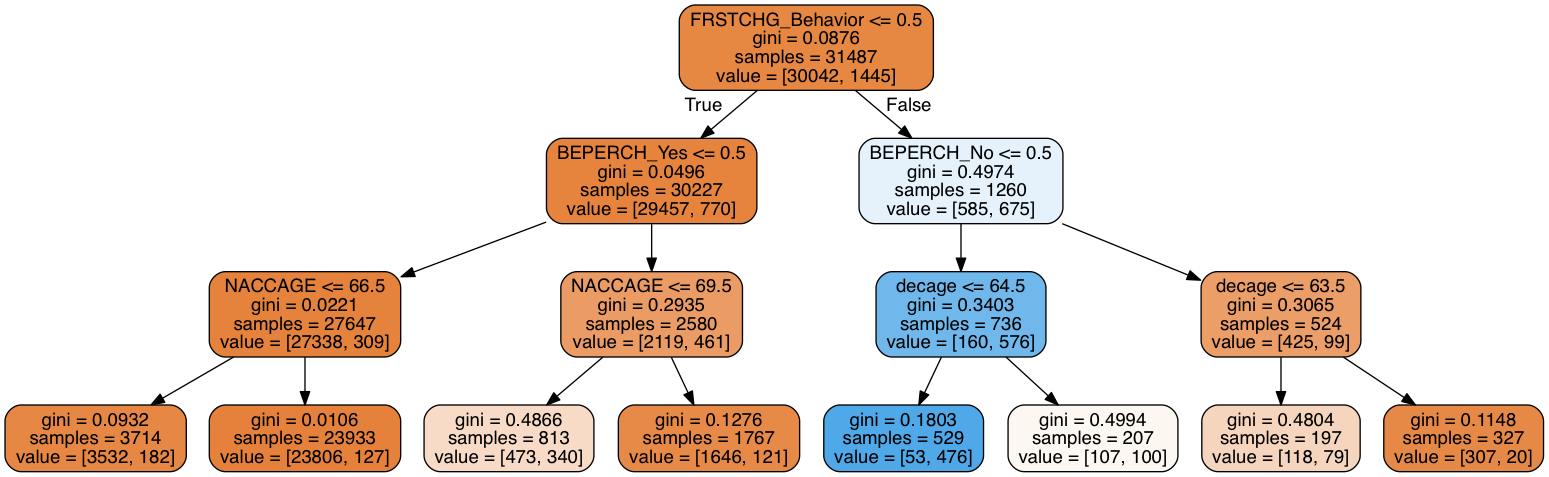

In [17]:
decisionTree(X_train, y_train, False)

Optimal number of features : 93


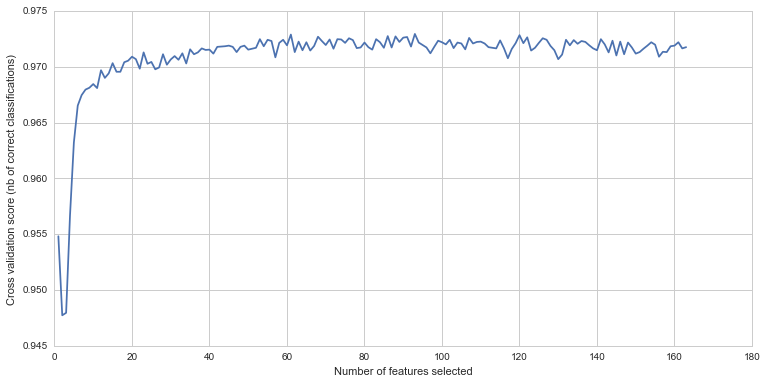

In [21]:
optimal_features(X, y)

#### 3- Modeling
Try different models

##### Random forest (default paremeters)

AUC = 0.75

In [33]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Accuracy: 0.861367673179


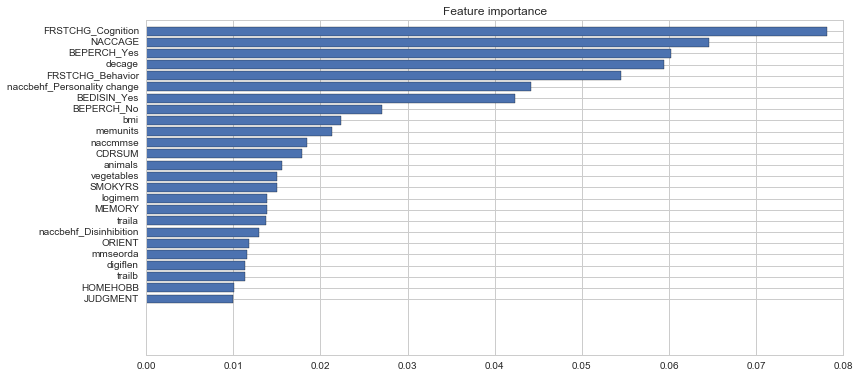

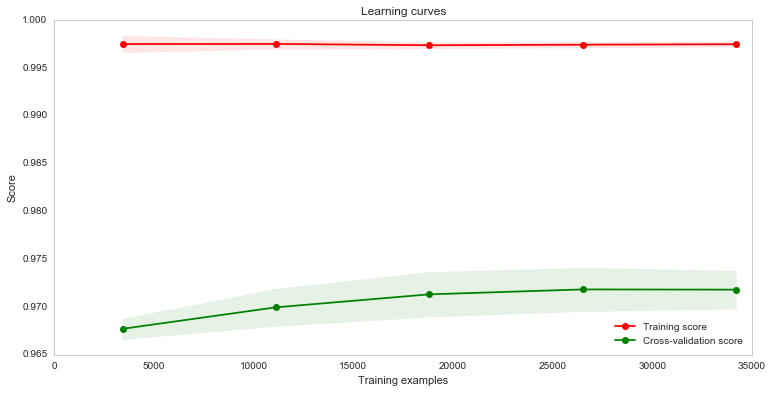

             precision    recall  f1-score   support

          0       0.98      0.87      0.92     10786
          1       0.17      0.60      0.27       474

avg / total       0.95      0.86      0.90     11260



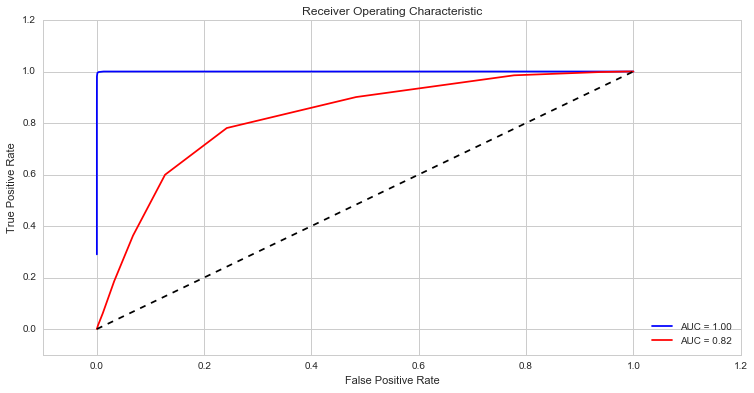

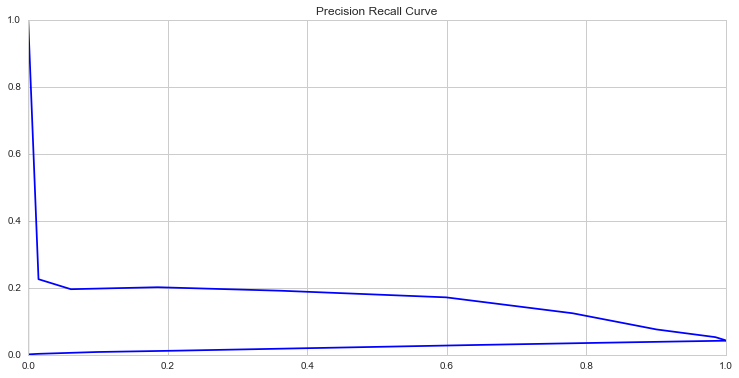

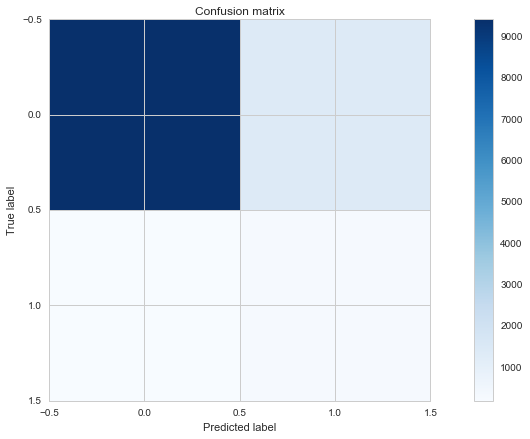

[[9415 1371]
 [ 190  284]]


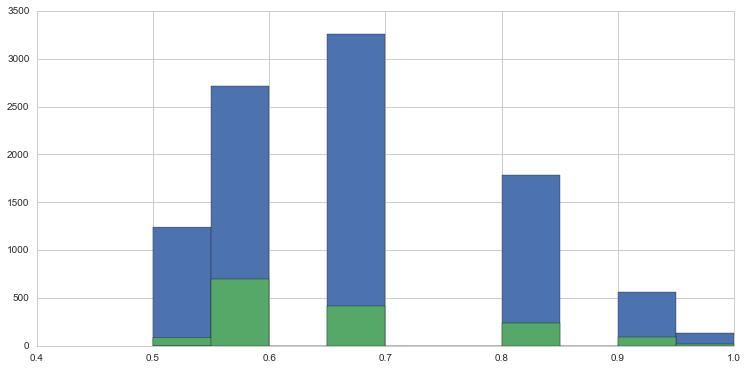

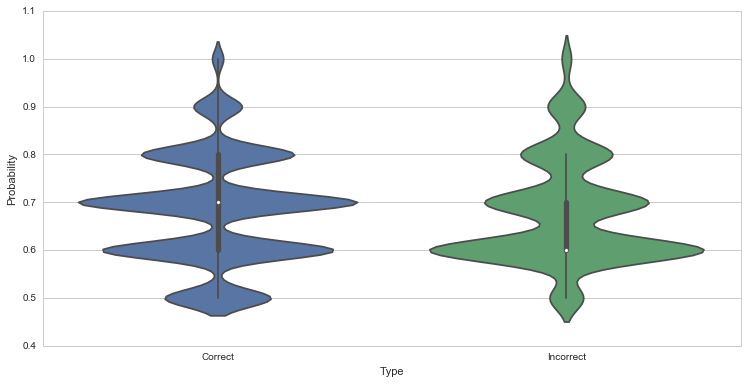

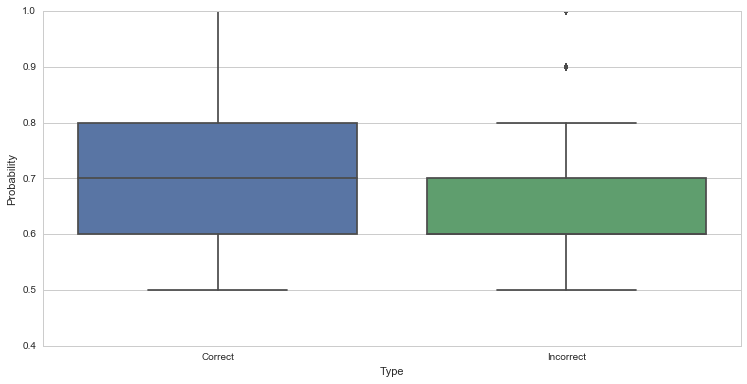

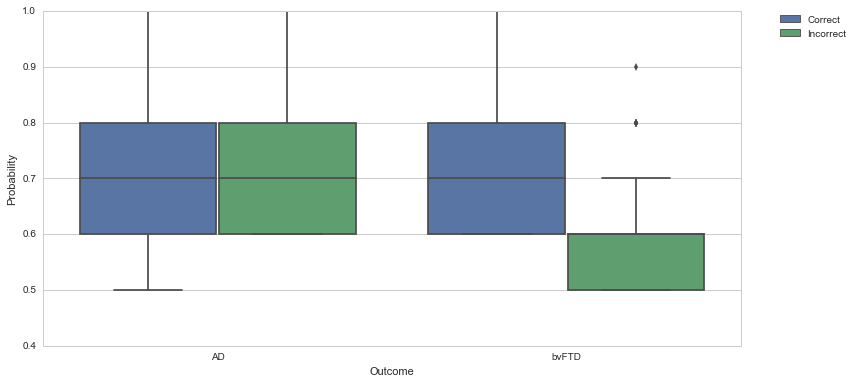

    Probability threshold  Percentage of cases  Accuracy
0                     0.0             1.000000  0.861368
1                     0.1             1.000000  0.861368
2                     0.2             1.000000  0.861368
3                     0.3             1.000000  0.861368
4                     0.4             1.000000  0.861368
5                     0.5             1.000000  0.861368
6                     0.6             0.579041  0.881288
7                     0.7             0.252309  0.875044
8                     0.8             0.252309  0.875044
9                     0.9             0.072558  0.853121
10                    1.0             0.013766  0.845161


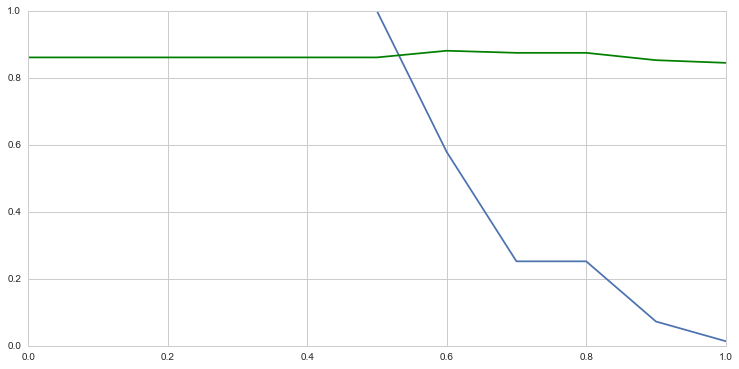

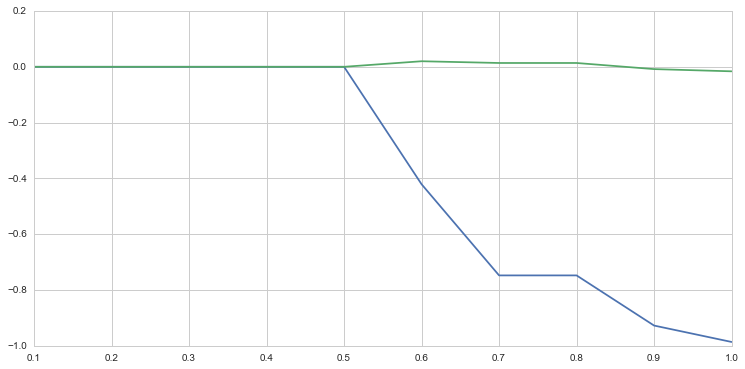

CPU times: user 43.3 s, sys: 747 ms, total: 44 s
Wall time: 44 s


In [29]:
%%time
clf_ = RandomForestClassifier()
clf_.fit(X_train, y_train)

viz(clf_, RandomForestClassifier())

##### Decision tree (default paremeters)

AUC=0.49

Accuracy: 0.43836589698


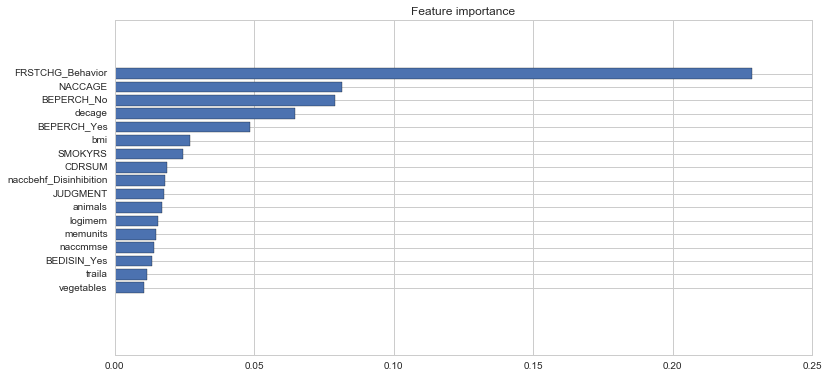

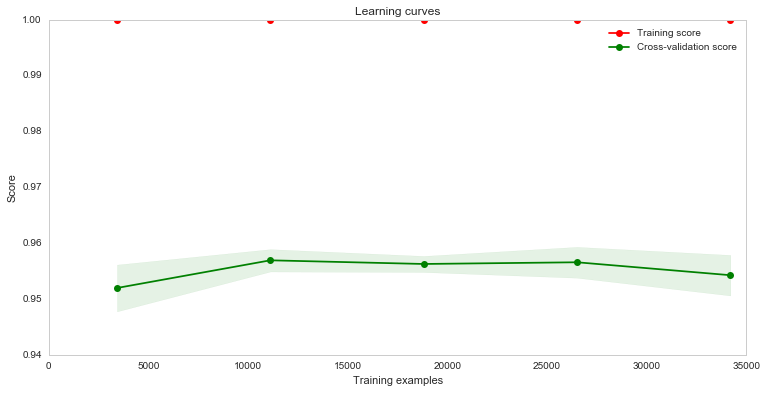

             precision    recall  f1-score   support

          0       0.96      0.43      0.60     10786
          1       0.04      0.54      0.07       474

avg / total       0.92      0.44      0.57     11260



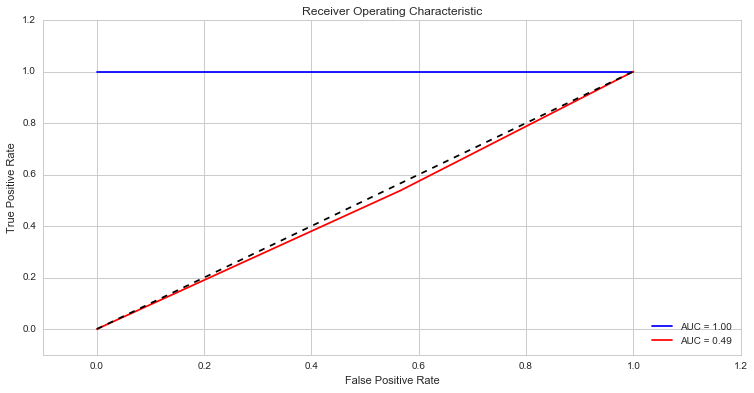

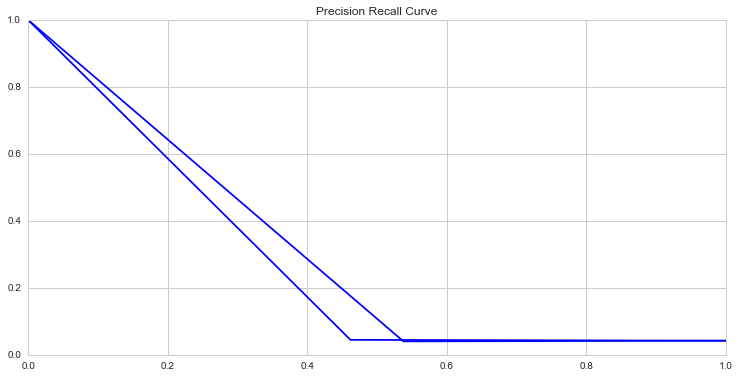

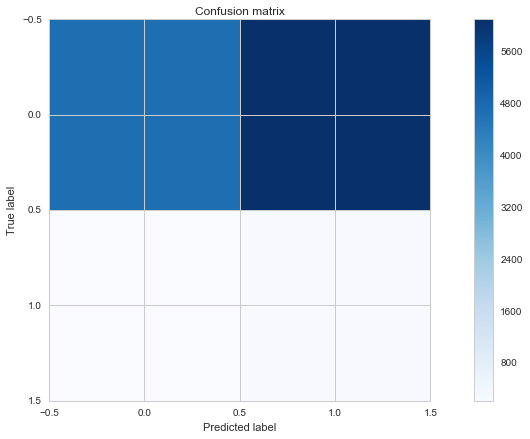

[[4681 6105]
 [ 219  255]]


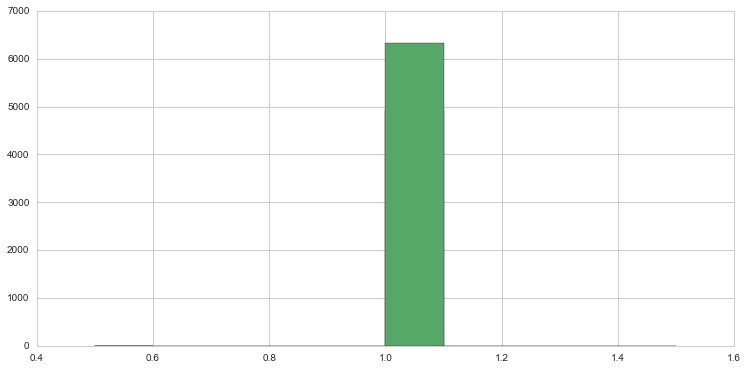

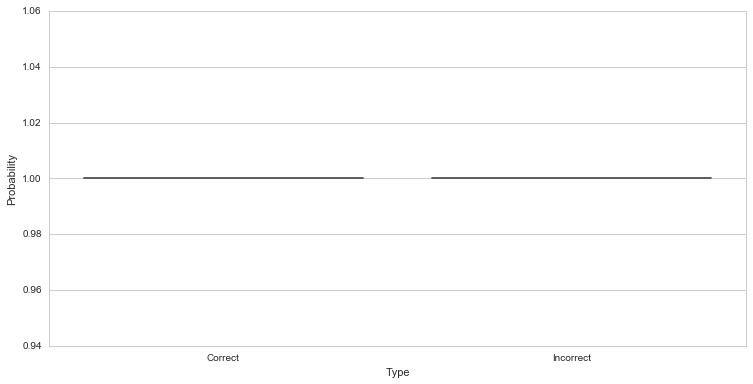

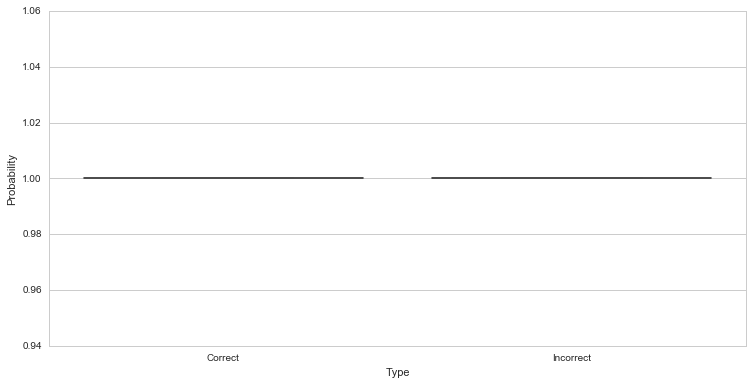

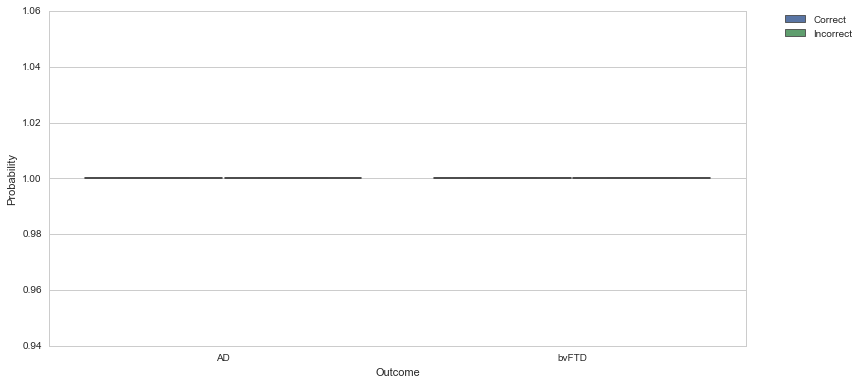

    Probability threshold  Percentage of cases  Accuracy
0                     0.0                  1.0  0.438366
1                     0.1                  1.0  0.438366
2                     0.2                  1.0  0.438366
3                     0.3                  1.0  0.438366
4                     0.4                  1.0  0.438366
5                     0.5                  1.0  0.438366
6                     0.6                  1.0  0.438366
7                     0.7                  1.0  0.438366
8                     0.8                  1.0  0.438366
9                     0.9                  1.0  0.438366
10                    1.0                  1.0  0.438366


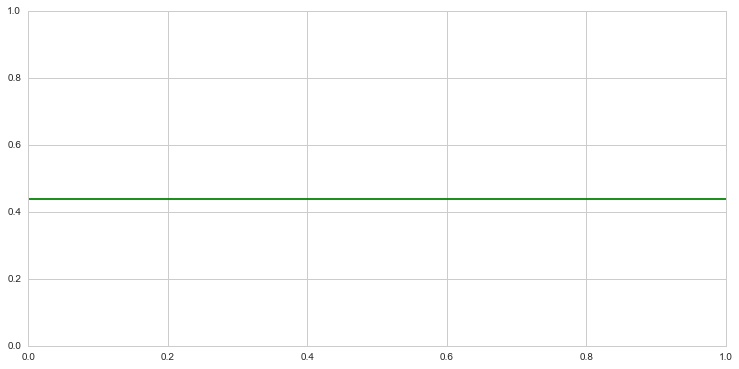

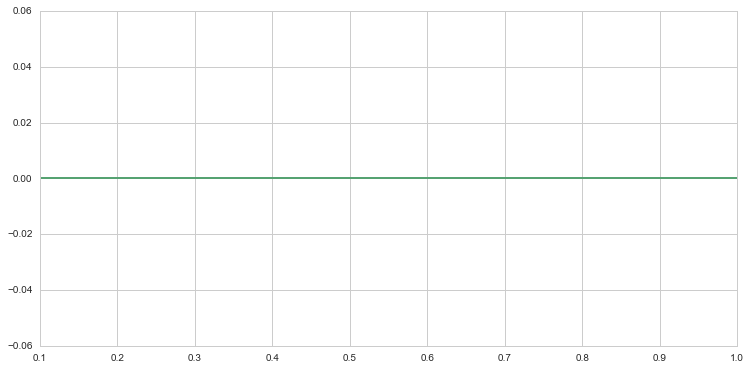

CPU times: user 59.8 s, sys: 646 ms, total: 1min
Wall time: 1min


In [38]:
%%time
from sklearn.tree import DecisionTreeClassifier
clf_ = DecisionTreeClassifier()
clf_.fit(X_train, y_train)

viz(clf_, DecisionTreeClassifier())

##### Random forest (1,000 trees)

AUC=0.83

Accuracy: 0.85595026643


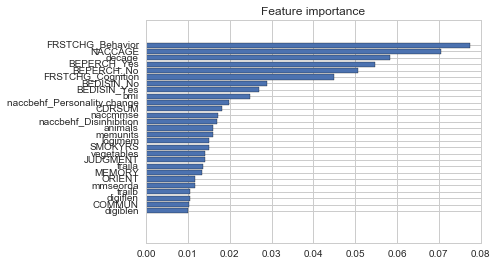

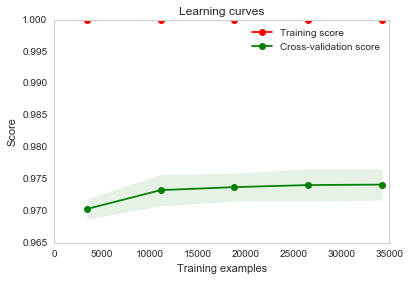

             precision    recall  f1-score   support

          0       0.98      0.87      0.92     10786
          1       0.17      0.63      0.27       474

avg / total       0.95      0.86      0.89     11260



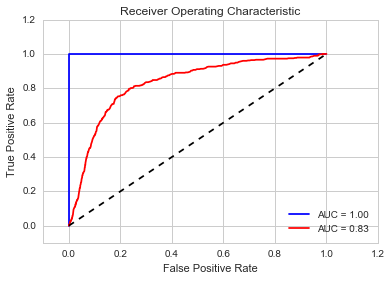

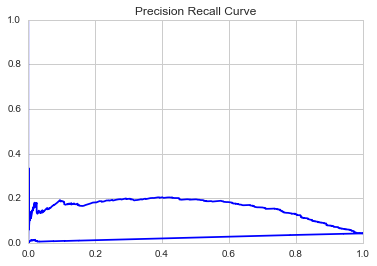

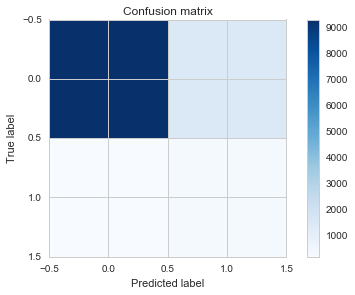

[[9339 1447]
 [ 175  299]]


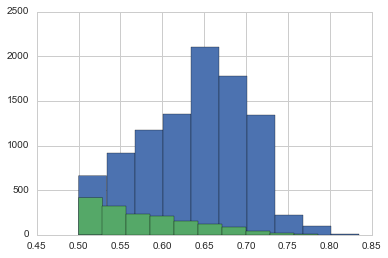

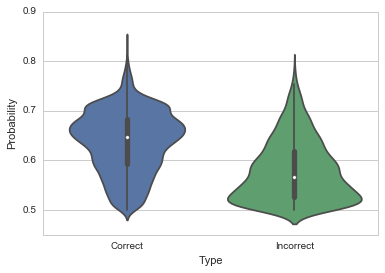

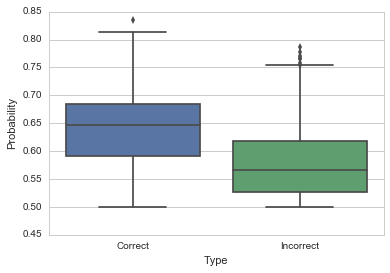

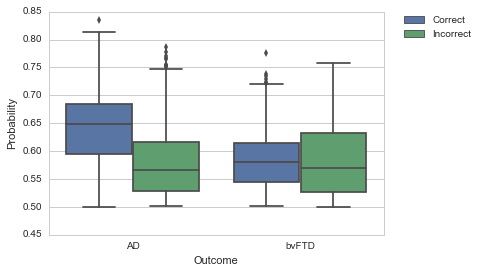

    Probability threshold  Percentage of cases  Accuracy
0                     0.0             1.000000  0.855950
1                     0.1             1.000000  0.855950
2                     0.2             1.000000  0.855950
3                     0.3             1.000000  0.855950
4                     0.4             1.000000  0.855950
5                     0.5             1.000000  0.855950
6                     0.6             0.659059  0.929120
7                     0.7             0.154174  0.957949
8                     0.8             0.001066  1.000000
9                     0.9             0.000000       NaN
10                    1.0             0.000000       NaN


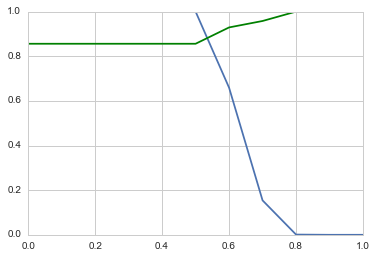

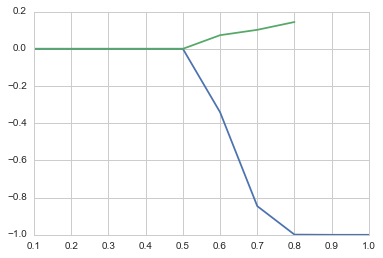

CPU times: user 10min 37s, sys: 10.3 s, total: 10min 47s
Wall time: 10min 49s


In [20]:
%%time
clf_ = RandomForestClassifier(n_estimators=1000)
clf_.fit(X_train, y_train)

viz(clf_, RandomForestClassifier(n_estimators=1000))

##### Gaussian Naiive Bayes

AUC=0.49

Accuracy: 0.0799289520426


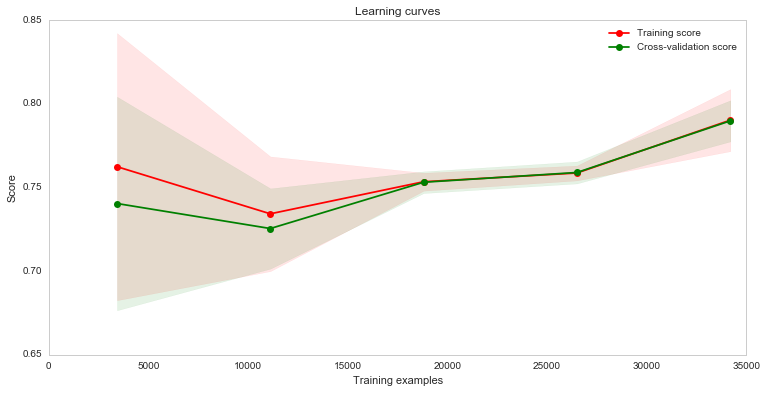

             precision    recall  f1-score   support

          0       0.94      0.04      0.08     10786
          1       0.04      0.94      0.08       474

avg / total       0.91      0.08      0.08     11260



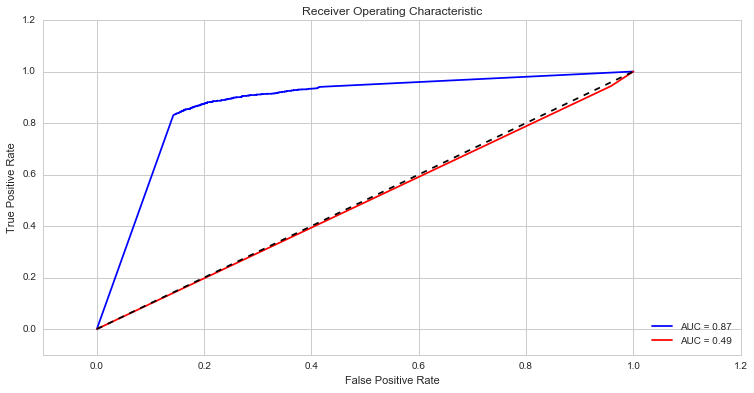

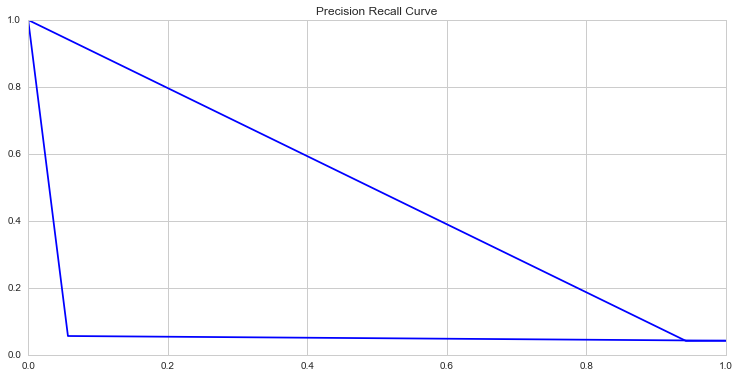

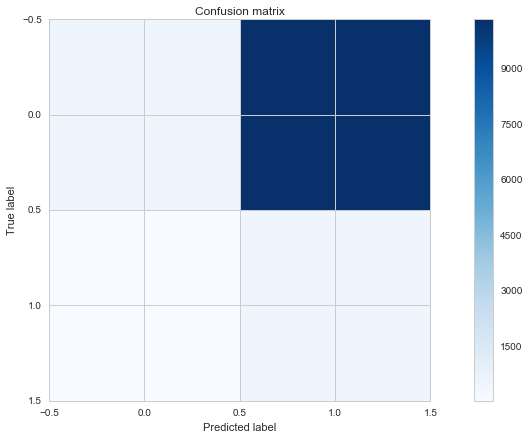

[[  453 10333]
 [   27   447]]


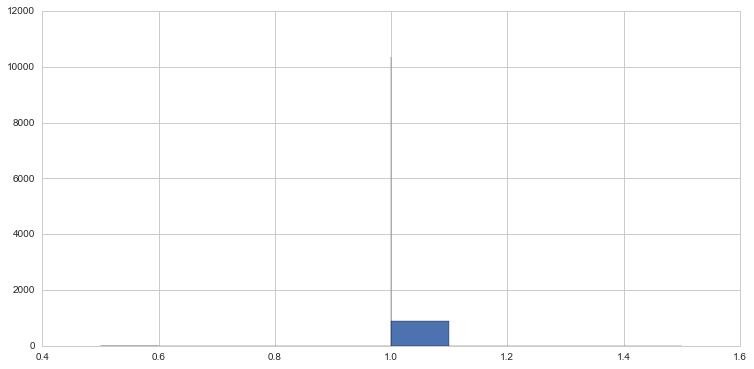

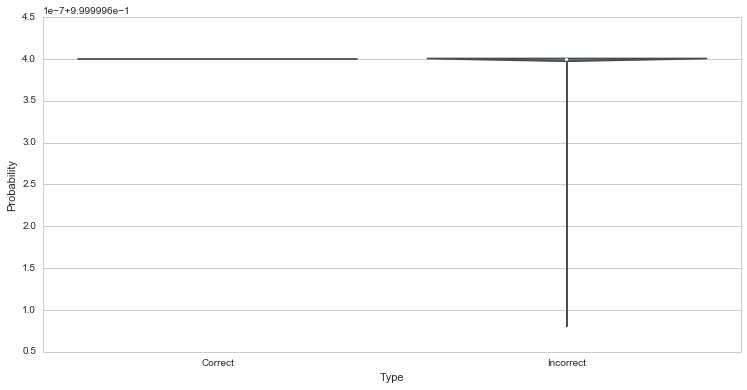

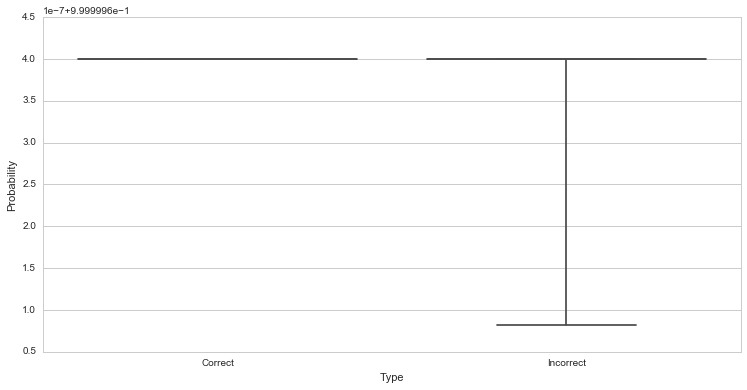

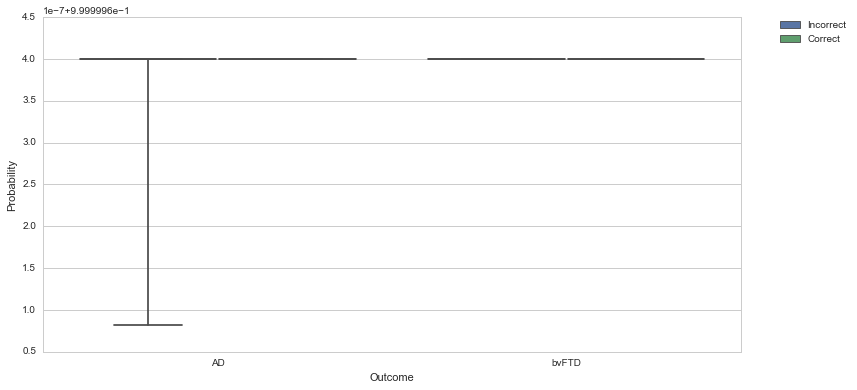

    Probability threshold  Percentage of cases  Accuracy
0                     0.0             1.000000  0.079929
1                     0.1             1.000000  0.079929
2                     0.2             1.000000  0.079929
3                     0.3             1.000000  0.079929
4                     0.4             1.000000  0.079929
5                     0.5             1.000000  0.079929
6                     0.6             1.000000  0.079929
7                     0.7             1.000000  0.079929
8                     0.8             1.000000  0.079929
9                     0.9             1.000000  0.079929
10                    1.0             0.999822  0.079943


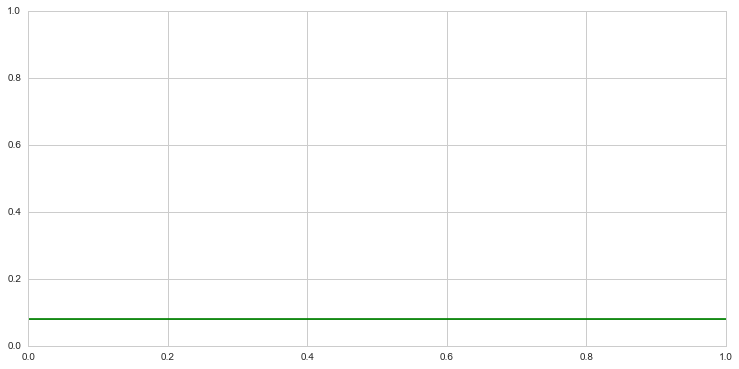

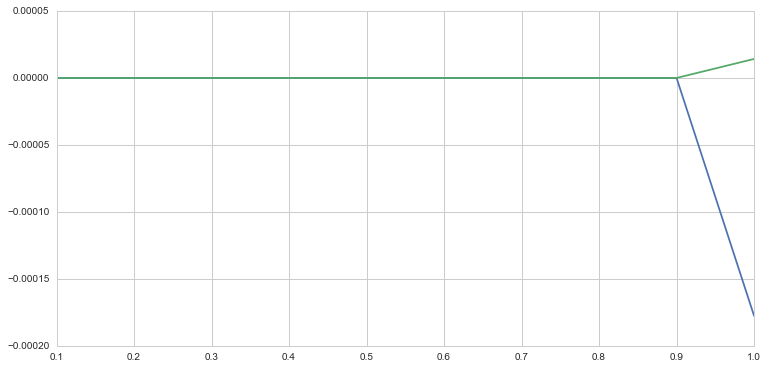

CPU times: user 55.4 s, sys: 1.98 s, total: 57.3 s
Wall time: 57.3 s


In [40]:
%%time
from sklearn.naive_bayes import GaussianNB

clf_ = GaussianNB()
clf_.fit(X_train, y_train)

viz(clf_, GaussianNB())

##### Gradient boosting (default parameters)

AUC = 0.62

Accuracy: 0.0723801065719


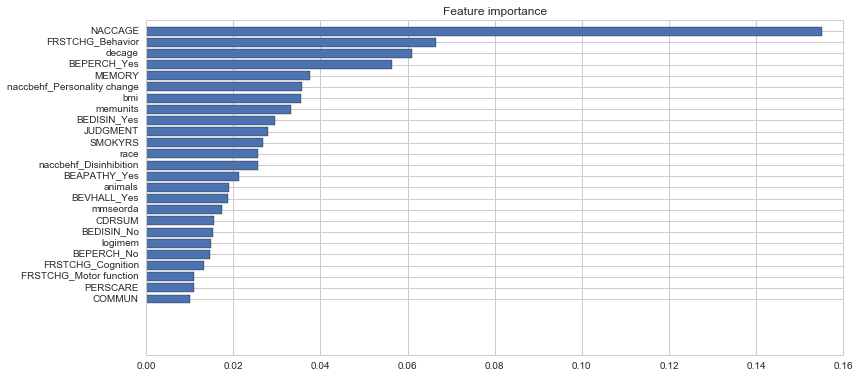

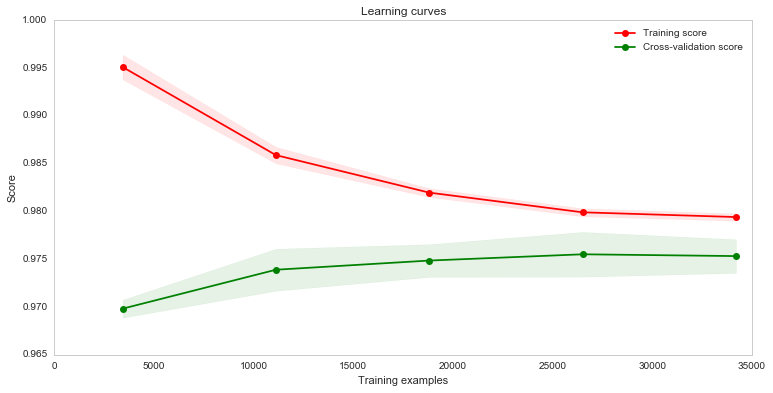

             precision    recall  f1-score   support

          0       0.97      0.03      0.06     10786
          1       0.04      0.98      0.08       474

avg / total       0.93      0.07      0.06     11260



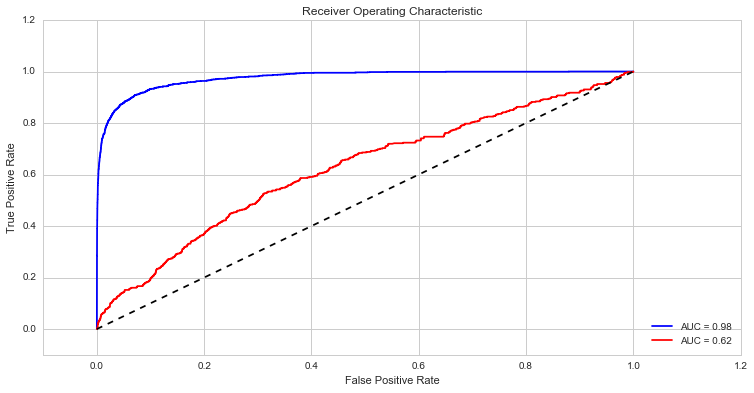

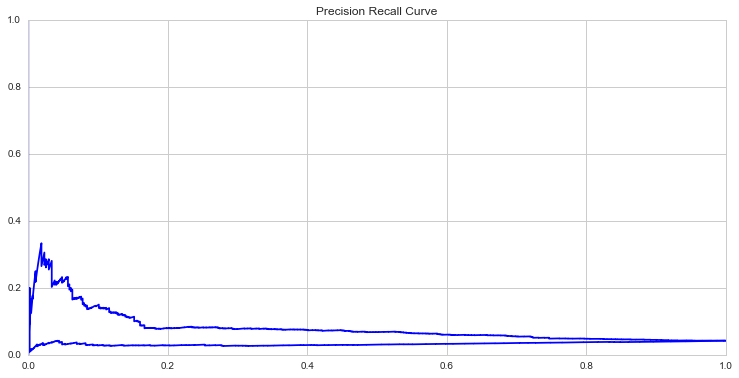

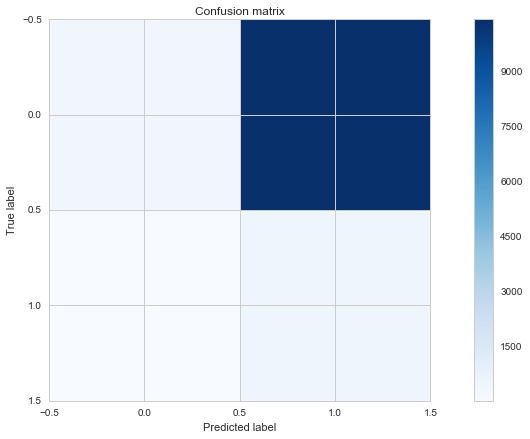

[[  352 10434]
 [   11   463]]


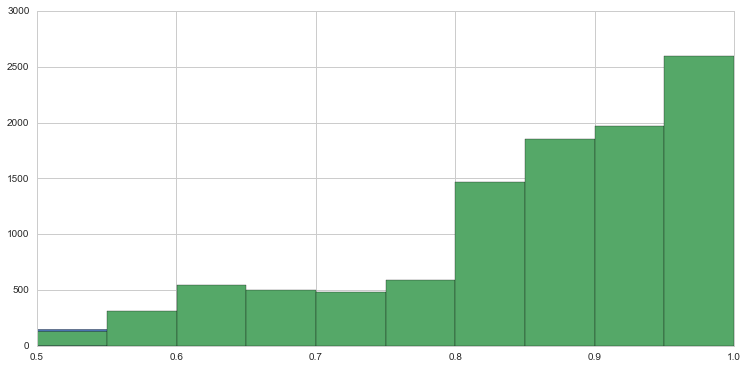

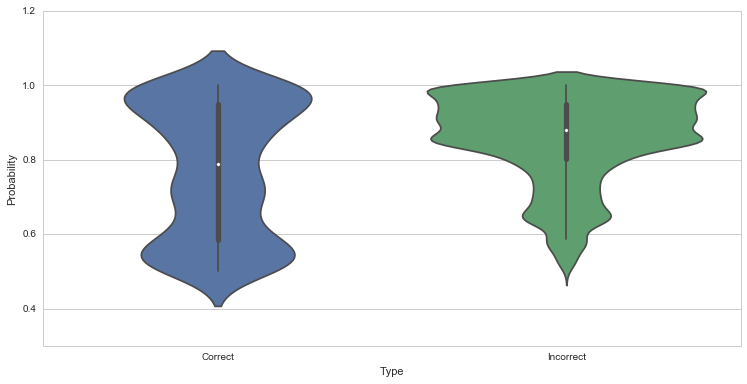

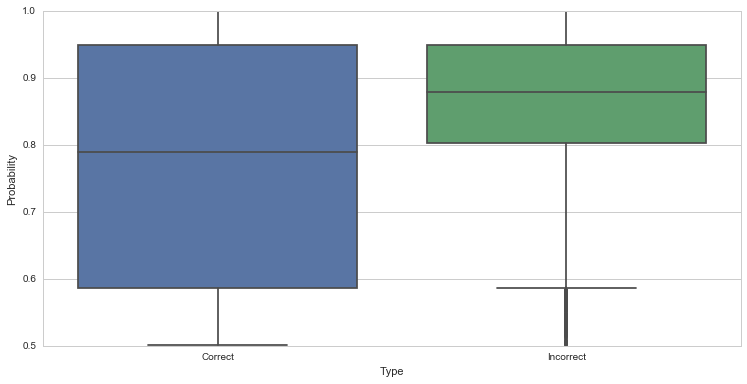

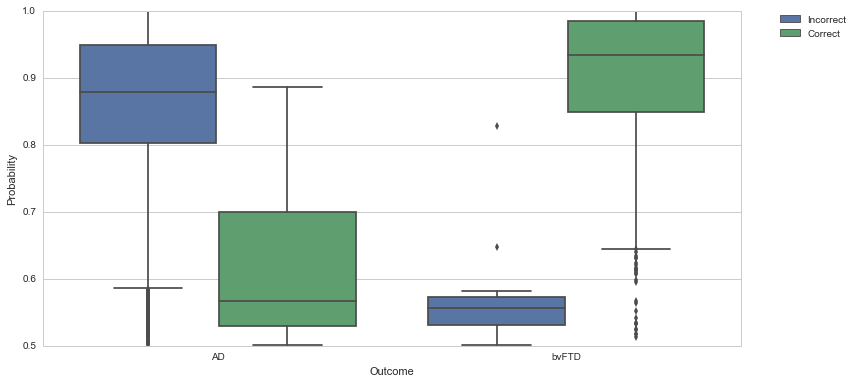

    Probability threshold  Percentage of cases  Accuracy
0                     0.0             1.000000  0.072380
1                     0.1             1.000000  0.072380
2                     0.2             1.000000  0.072380
3                     0.3             1.000000  0.072380
4                     0.4             1.000000  0.072380
5                     0.5             1.000000  0.072380
6                     0.6             0.940764  0.055131
7                     0.7             0.840941  0.053754
8                     0.8             0.737034  0.048681
9                     0.9             0.431172  0.059320
10                    1.0             0.000000       NaN


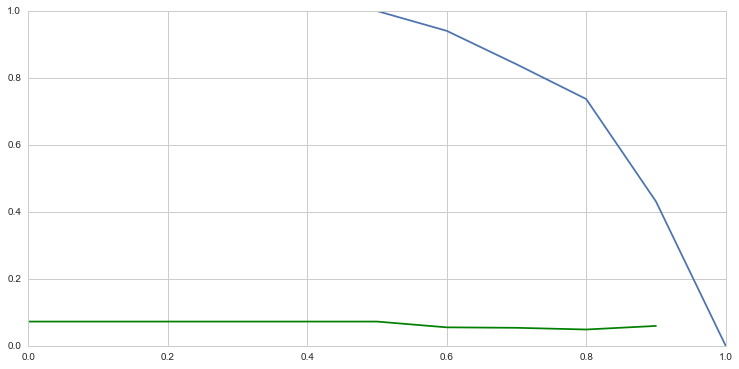

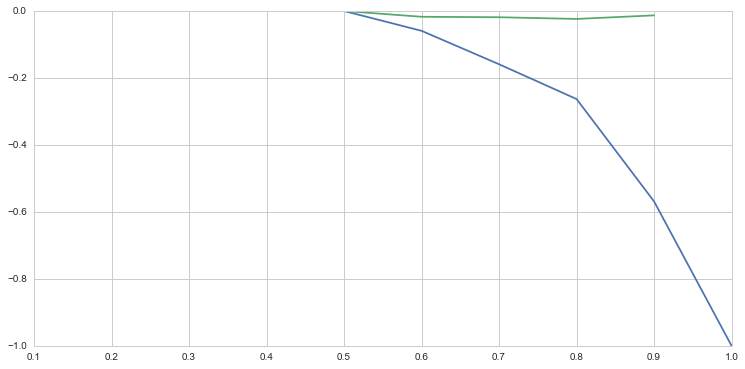

CPU times: user 3min 37s, sys: 1.38 s, total: 3min 39s
Wall time: 3min 39s


In [41]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

clf_ = GradientBoostingClassifier()
clf_.fit(X_train, y_train)

viz(clf_, GradientBoostingClassifier())

##### AdaBoost (default paremeters)

AUC=0.56

Accuracy: 0.17460035524


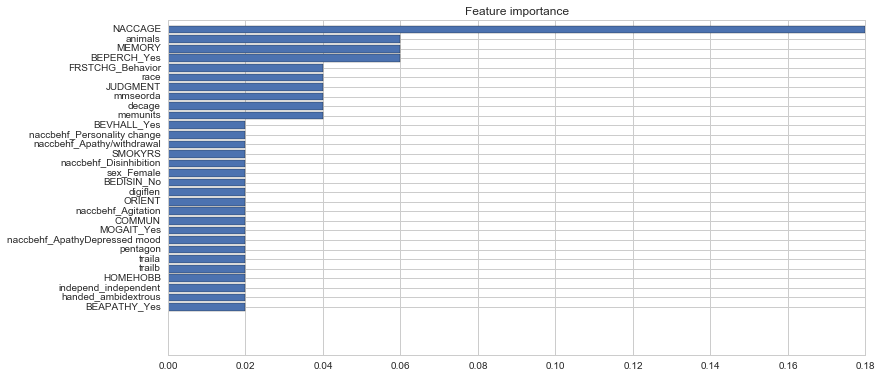

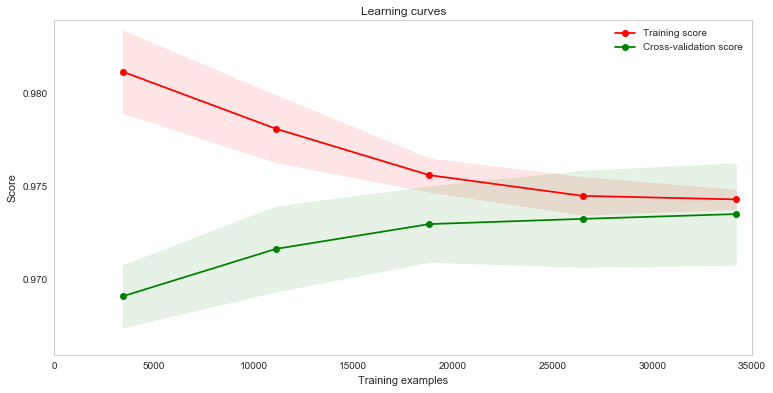

             precision    recall  f1-score   support

          0       0.98      0.14      0.25     10786
          1       0.05      0.95      0.09       474

avg / total       0.94      0.17      0.24     11260



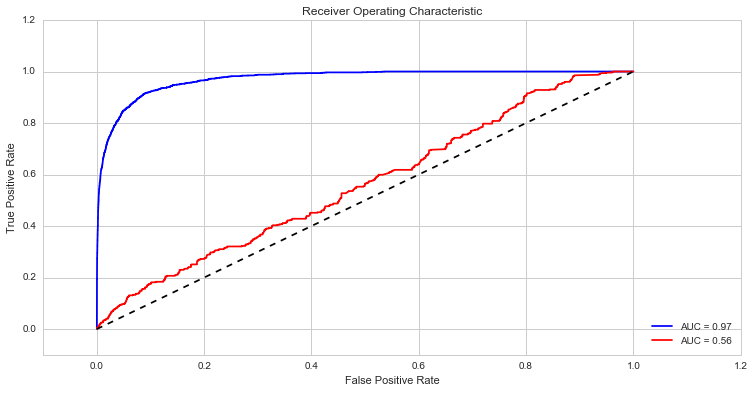

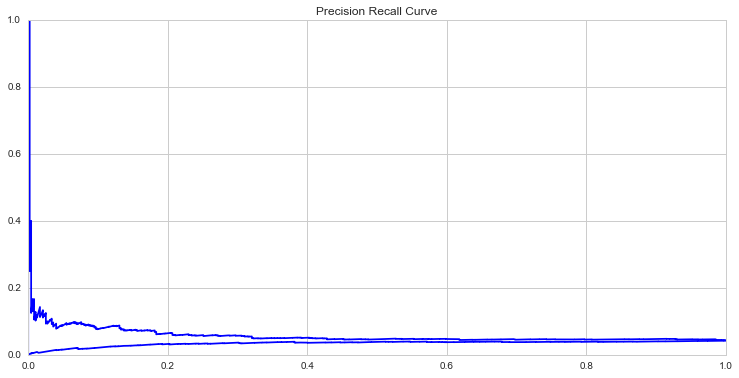

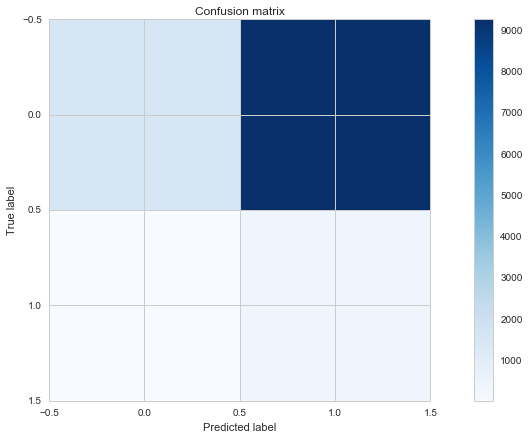

[[1516 9270]
 [  24  450]]


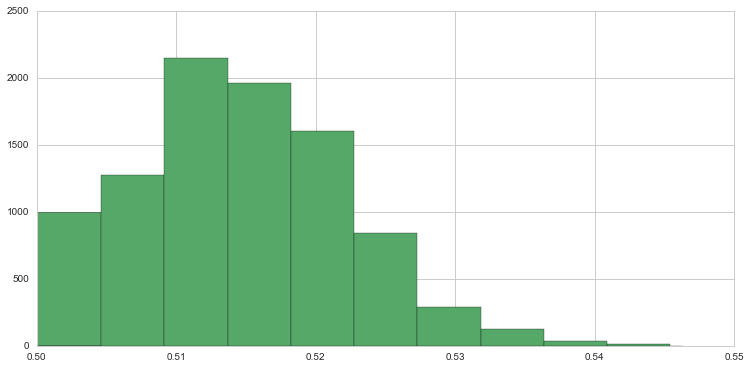

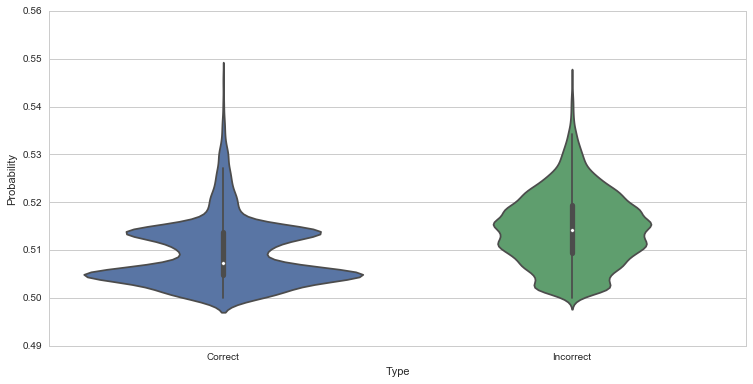

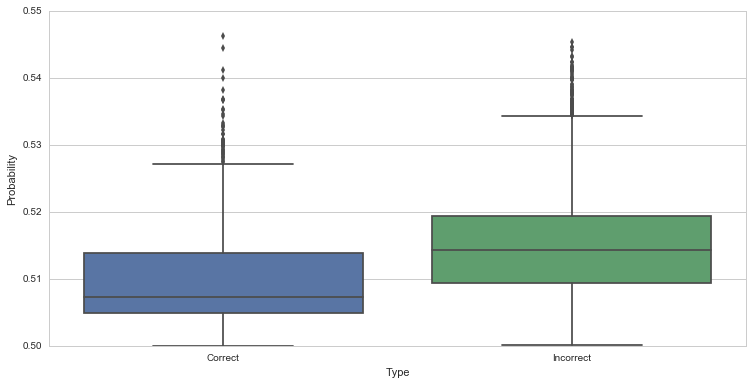

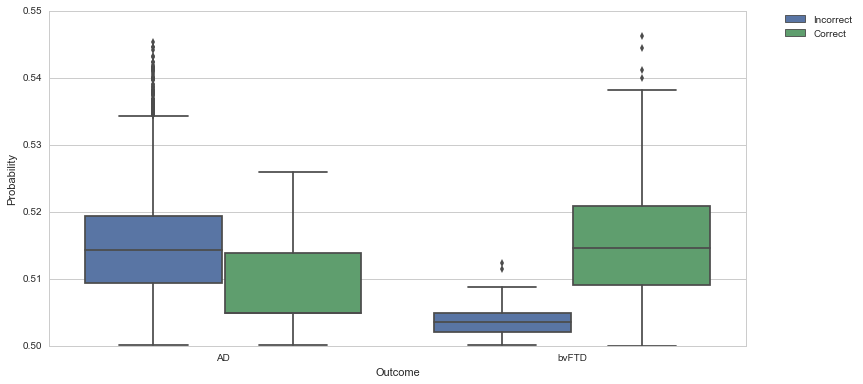

    Probability threshold  Percentage of cases  Accuracy
0                     0.0                  1.0    0.1746
1                     0.1                  1.0    0.1746
2                     0.2                  1.0    0.1746
3                     0.3                  1.0    0.1746
4                     0.4                  1.0    0.1746
5                     0.5                  1.0    0.1746
6                     0.6                  0.0       NaN
7                     0.7                  0.0       NaN
8                     0.8                  0.0       NaN
9                     0.9                  0.0       NaN
10                    1.0                  0.0       NaN


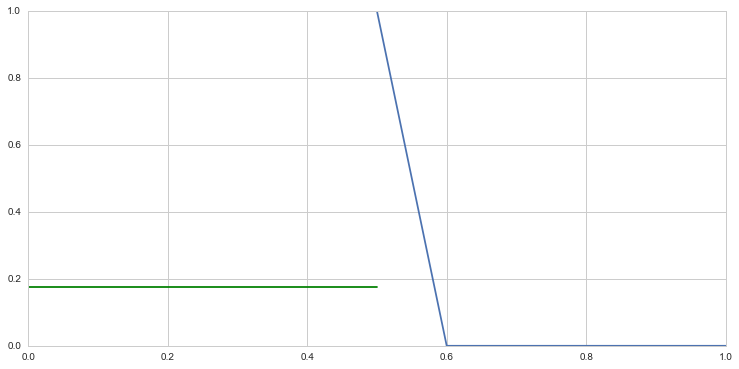

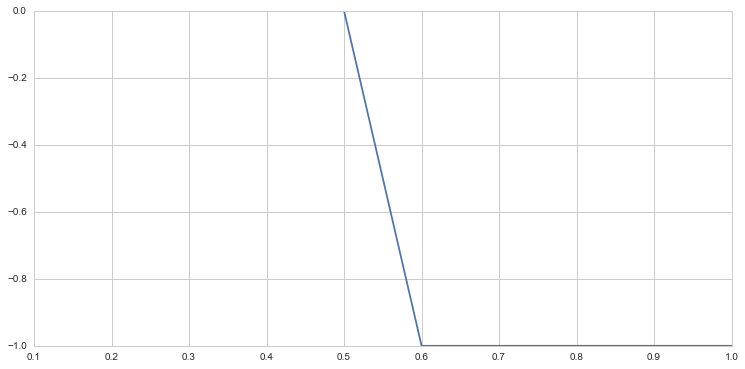

CPU times: user 1min 15s, sys: 823 ms, total: 1min 16s
Wall time: 1min 16s


In [42]:
%%time
from sklearn.ensemble import AdaBoostClassifier

clf_ = AdaBoostClassifier()
clf_.fit(X_train, y_train)

viz(clf_, AdaBoostClassifier())

#### 4- Serialize (pickle) the model

In [20]:
from sklearn.externals import joblib

In [43]:
joblib.dump(X_train, 'model_columns.pkl')

['model_columns.pkl', 'model_columns.pkl_01.npy', 'model_columns.pkl_02.npy']

In [36]:
joblib.dump(clf_, 'model.pkl')

['model.pkl',
 'model.pkl_01.npy',
 'model.pkl_02.npy',
 'model.pkl_03.npy',
 'model.pkl_04.npy',
 'model.pkl_05.npy',
 'model.pkl_06.npy',
 'model.pkl_07.npy',
 'model.pkl_08.npy',
 'model.pkl_09.npy',
 'model.pkl_10.npy',
 'model.pkl_11.npy',
 'model.pkl_12.npy',
 'model.pkl_13.npy',
 'model.pkl_14.npy',
 'model.pkl_15.npy',
 'model.pkl_16.npy',
 'model.pkl_17.npy',
 'model.pkl_18.npy',
 'model.pkl_19.npy',
 'model.pkl_20.npy',
 'model.pkl_21.npy',
 'model.pkl_22.npy',
 'model.pkl_23.npy',
 'model.pkl_24.npy',
 'model.pkl_25.npy',
 'model.pkl_26.npy',
 'model.pkl_27.npy',
 'model.pkl_28.npy',
 'model.pkl_29.npy',
 'model.pkl_30.npy',
 'model.pkl_31.npy',
 'model.pkl_32.npy',
 'model.pkl_33.npy',
 'model.pkl_34.npy',
 'model.pkl_35.npy',
 'model.pkl_36.npy',
 'model.pkl_37.npy',
 'model.pkl_38.npy',
 'model.pkl_39.npy',
 'model.pkl_40.npy',
 'model.pkl_41.npy',
 'model.pkl_42.npy',
 'model.pkl_43.npy',
 'model.pkl_44.npy',
 'model.pkl_45.npy',
 'model.pkl_46.npy',
 'model.pkl_47.npy',

### Helper functions

In [8]:
def optimal_features(X, y):
    from sklearn.cross_validation import StratifiedKFold
    from sklearn.feature_selection import RFECV

    # svc = SVC(kernel="linear")
    # The "accuracy" scoring is proportional to the number of correct
    # classifications
    rfecv = RFECV(estimator=RandomForestClassifier(), step=1, cv=StratifiedKFold(y, 2),
                  scoring='accuracy')
    rfecv.fit(X, y)

    print("Optimal number of features : %d" % rfecv.n_features_)

    # Plot number of features VS. cross-validation scores
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score (nb of correct classifications)")
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    plt.show()

In [9]:
def decisionTree(X, y, regression, max_depth=3):
    from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
    from sklearn.tree import export_graphviz
    from sklearn.externals.six import StringIO  
    from IPython.core.pylabtools import figsize
    from IPython.display import Image
    figsize(12.5, 6)
    import pydot
    
    if regression:
        clf = DecisionTreeRegressor(max_depth=max_depth)
    else:
        clf = DecisionTreeClassifier(max_depth=max_depth)
        
    clf.fit(X, y)
    dot_data = StringIO()  
    export_graphviz(clf, out_file=dot_data, feature_names=list(X.columns),
                    filled=True, rounded=True,)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())  

In [10]:
def viz(clf, clf_raw):
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    
    print 'Accuracy: %s' % clf.score(X_test, y_test)
    
    try:
        featureImportance(X_train, clf, 0.01)
    except:
        pass
        
    plot_learning_curve(clf_raw,
                        'Learning curves', X_train, y_train, cv=5)
    y_pred = clf.predict(X_test)
    print classification_report(y_test, y_pred)

    roc_curve(clf, (X_train, y_train, X_test, y_test), False)
    precision_recall_curve(clf, X_test, y_test)

    statistics(clf, X_train, y_train, X_test, y_test, False)

    plot_confusion_matrix(clf, X_test, y_test)
    print confusion_matrix(y_test, y_pred)

    # instances
    instances= {'good': [], 'bad': []}
    preds_proba = clf.predict_proba(X_test)
    preds = clf.predict(X_test)

    l = []
    for i in range(len(y_test)):
        correct_index = list(y_test)[i]
        pred = preds[i]
        pred_proba = preds_proba[i][pred]

        instances[('good' if pred == correct_index else 'bad')].append(pred_proba)

        l.append({'Type': ('Correct' if pred == correct_index else 'Incorrect'),
                 'Outcome': le.inverse_transform(correct_index),
                 'Probability': pred_proba})

    df_sns_proba = pd.DataFrame(l)

    pd.Series(instances['good']).hist()
    pd.Series(instances['bad']).hist()
    plt.show()
    l = [{'Type': 'Correct', 'Probability': x} for x in instances['good']]
    l += [{'Type': 'Incorrect', 'Probability': x} for x in instances['bad']]
    df_sns = pd.DataFrame(l)
    sns.violinplot(x='Type', y='Probability', data=df_sns)
    plt.show()
    sns.boxplot(x='Type', y='Probability', data=df_sns)
    plt.show()
    sns.boxplot(x='Outcome', y='Probability', hue='Type', data=df_sns_proba)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    probabilities_to_check = np.linspace(0, 1, num=11)

    l = []
    for probability_threshold in probabilities_to_check:
        a = [list(y_test)[i] == preds[i] for i, p in enumerate(preds_proba) if np.max(p) >= probability_threshold]
        accuracy = np.nan
        if len(a) > 0:
            accuracy = sum(a) / float(len(a))
            
        l.append({'Probability threshold': probability_threshold,
                 'Percentage of cases': len(a) / float(len(y_test)),
                  'Accuracy': accuracy
                 })

    a = pd.DataFrame(l)[['Probability threshold', 'Percentage of cases', 'Accuracy']]
    print a

    plt.plot(a['Probability threshold'], a['Percentage of cases'])
    plt.plot(a['Probability threshold'], a['Accuracy'], c='g')
    plt.ylim([0, 1])
    plt.show()
    plt.plot(a['Probability threshold'], a['Percentage of cases'].diff().cumsum())
    plt.plot(a['Probability threshold'], a['Accuracy'].diff().cumsum())
    plt.show()

In [11]:
# 1- Toss overly unique categorical variables
# 2- OHE categorical variables
# 3- Fill NaN with 0 for numerics
# 4- LabelEncode the target if categorical

def remove_columns(df, exclusions):
    if len(exclusions) > 0:
        return df[df.columns.difference(exclusions)]
    else:
        return df
    
    
def report_column_alteration(column, action, notes):
    if type(notes) == float:
        notes = '{:0.1f}%'.format(notes)
        
    print '%15s %25s %15s' % (column, action, notes)

    
def prepare_df(df, target, target_label_encoder=None, report=True):
    columns_to_ohe = []  # columns to be one-hot-encoded
    columns_to_remove = []
    target_label_encoder = None
    
    for col, col_type in zip(df.dtypes.index, df.dtypes.values):
        if col_type == 'O':
            if col == target:
                if report:
                    print('Encoding the target variable')
                    
                if not target_label_encoder:
                    target_label_encoder = LabelEncoder()
                    target_label_encoder.fit(df[col])
                
                df[col] = target_label_encoder.transform(df[col])

            else:
                ratio = df[col].nunique() / float(len(df))
                
                if ratio < 0.1:
                    columns_to_ohe.append(col)
                else:
                    columns_to_remove.append(col)
                    
                    if report:
                        report_column_alteration(col, 'Removed- overly unique', ratio * 100)

        else:
            count_na = int(len(df) - df[col].count())
            if count_na > 0:
                df[col] = df[col].fillna(-999)
                
                if report:
                    report_column_alteration(col, 'Fill NA', (100 * count_na / float(len(df))))
            
    return df, columns_to_remove, columns_to_ohe, target_label_encoder


def prepare_df_pipeline(df, target, exclusions, target_label_encoder=None, report=True):
    df = remove_columns(df, exclusions)
    df, columns_to_remove, columns_to_ohe, target_label_encoder = prepare_df(df,
                                                                             target,
                                                                             target_label_encoder,
                                                                             report)
    df = remove_columns(df, columns_to_remove)
    df = pd.get_dummies(df, columns=columns_to_ohe)
    X, y = get_xy(df, target)
    
    return X, y, target_label_encoder


def get_xy(df, target):
    X = df[df.columns.difference([target])]
    y = df[target]
    return X, y


def train_test_xy(df, target, exclusions, file_name_test, test_set_percentage):
    X, y, target_label_encoder = prepare_df_pipeline(df, target, exclusions)

    if file_name_test:
        X_train, y_train = X, y
        df_test = pd.read_csv(file_name_test)
        X_test, y_test, _ = prepare_df_pipeline(df_test, target, exclusions, target_label_encoder, False)

    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_set_percentage)
        
    print '=' * 30
    print 'Features  : %s' % X_train.shape[1]
    print 'Train set : %s' % X_train.shape[0]
    print 'Test set  : %s' % X_test.shape[0]
    print '=' * 30
        
    return X_train, X_test, y_train, y_test, target_label_encoder

In [12]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    from sklearn.learning_curve import learning_curve
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()


def roc_curve(clf, data, regression):
    from sklearn.metrics import roc_curve, auc
    
    X_train, y_train, X_test, y_test = data
    
    if regression:
        """
        plots actual vs. predicted
        plots error
        """
        pred_train = clf.predict(X_train)
        pred_test = clf.predict(X_test) 
        plt.scatter(y_test, pred_test, color='r', label='X')
        plt.scatter(y_train, pred_train)
        plt.plot([min(min(pred_train), min(pred_test)), max(max(pred_train), max(pred_test))],
                 [min(min(y_train), min(y_test)), max(max(y_train), max(y_test))], 'k--')
        plt.title('Predicted vs. actual for train and test')
        plt.legend()
        plt.show()
        
        print '\n'
        
        plt.plot([x - y for x, y in zip(y_test, pred_test)], color='r')
        plt.plot([x - y for x, y in zip(y_train, pred_train)])
        plt.title('Actual - prediction (error)')
        plt.show()
    else:
        """
        plots the ROC curve
        """
        pred_train_prob = [x[1] for x in clf.predict_proba(X_train)]
        pred_test_prob = [x[1] for x in clf.predict_proba(X_test)]
        fpr, tpr, thresholds = roc_curve(y_train, pred_train_prob)
        roc_auc = auc(fpr, tpr)
        plt.title('Receiver Operating Characteristic')
        plt.plot(fpr, tpr, 'b',
        label='AUC = %0.2f'% roc_auc)
        fpr, tpr, thresholds = roc_curve(y_test, pred_test_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, 'r',
                label='AUC = %0.2f'% roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0,1],[0,1],'k--')
        plt.xlim([-0.1,1.2])
        plt.ylim([-0.1,1.2])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
        
        
def plot_confusion_matrix(clf, X_test, y_test, title='Confusion matrix', cmap=plt.cm.Blues):
    from sklearn.metrics import confusion_matrix
    
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    # tick_marks = np.arange(len(iris.target_names))
    # plt.xticks(tick_marks, iris.target_names, rotation=45)
    # plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
    
def precision_recall_curve(clf, X_test, y_test):
    from sklearn.metrics import precision_recall_curve
    
    for i in range(2):
        y_probabilities = [x[i] for x in clf.predict_proba(X_test)]
        precision, recall, thresholds = precision_recall_curve(y_test, y_probabilities)

        plt.title('Precision Recall Curve')
        plt.plot(recall, precision, 'b')

    plt.show()
    
def barh_dic(f, title=None):
    import operator
    
    y = sorted(f.items(), key=operator.itemgetter(1))
    keys = [a[0] for a in y]
    vals = [a[1] for a in y]
    plt.barh(range(len(y)), vals, align='center')
    plt.yticks(range(len(y)), keys)
    
    if title:
        plt.title(title)
        
    plt.show()

def featureImportance(X, clf, threshold=0.03, return_=False, show=True):
    item = clf.feature_importances_
        
    val = dict((x, y) for x, y in zip(X.columns, item))
    
    val_ = dict({k:val[k] for k in val if val[k] >= threshold})
        
    if show:
        barh_dic(val_, 'Feature importance')

    if return_:
        return val
    
    
def statistics(clf, X_train, y_train, X_test, y_test, regression):    
    from sklearn.metrics import precision_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import roc_auc_score
    
    if regression:
        r2_train = clf.score(X_train, y_train)
        r2_test = clf.score(X_test, y_test)
        mse_train = mse(y_train, clf.predict(X_train))
        mse_test = mse(y_test, clf.predict(X_test))
        mae_train = mae(y_train, clf.predict(X_train))
        mae_test = mae(y_test, clf.predict(X_test))
        # mean relative error
        mre_train = mean_relative_error(y_train, clf.predict(X_train))
        mre_test = mean_relative_error(y_test, clf.predict(X_test))
        
        return pd.DataFrame({
                'R2 train': [r2_train],
                'R2 test': [r2_test],
                'R2 %': [r2_test / r2_train - 1],
                'MSE train': [mse_train],
                'MSE test': [mse_test],
                'MSE %': mse_test / mse_train - 1,
                'MAE train': [mae_train],
                'MAE test': [mae_test],
                'MAE %': mae_test / mae_train - 1,
                'MRE train': [mre_train],
                'MRE test': [mre_test],
                'MRE %': mre_test / mre_train - 1
            }).transpose()

    else:
        accuracy_train = clf.score(X_train, y_train)
        accuracy_test = clf.score(X_test, y_test)
        precision_train = precision_score(y_train, clf.predict(X_train))
        precision_test = precision_score(y_test, clf.predict(X_test))
        recall_train = recall_score(y_train, clf.predict(X_train))
        recall_test = recall_score(y_test, clf.predict(X_test))
        f1_train = f1_score(y_train, clf.predict(X_train))
        f1_test = f1_score(y_test, clf.predict(X_test))
        
        roc_train = -1
        roc_test = -1
        if hasattr(clf, 'predict_proba'):
            roc_train = roc_auc_score(y_train, [x[1] for x in clf.predict_proba(X_train)])
            roc_test = roc_auc_score(y_test, [x[1] for x in clf.predict_proba(X_test)])
        
        val = {
                'Accuracy train': [accuracy_train],
                'Accuracy test': [accuracy_test],
                'Accuracy %': accuracy_test / accuracy_train - 1,
                'Precision train': [precision_train],
                'Precision test': [precision_test],
                'Precision %': precision_test / precision_train - 1,
                'Recall train': [recall_train],
                'Recall test': [recall_test],
                'Recall %': recall_test / recall_train - 1,
                'F1 train': [f1_train],
                'F1 test': [f1_test],
                'F1 %': f1_test / f1_train - 1,
        }
        
        if roc_train != -1:
            val['ROC train'] = [roc_train]
            val['ROC test'] = [roc_test]
            val['ROC %'] = roc_test / roc_train - 1
        
        return pd.DataFrame(val).transpose()